# Actividad 6: Cliques y grafos planos
###### Alberto Benavides


En esta ocasión se determinará cuándo un grafo no es plano a través de cliques y el teorema de Kuratowski para el caso de $K_5$. Con el uso de la librería [NetworkX](https://networkx.github.io/) y las ${5 \choose 2}$ combinaciones de cinco nodos generadas con la librería [itertools](https://docs.python.org/3/library/itertools.html) se puede diseña un grafo $K_5$ al añadir aristas entre cada par de nodos de dicho grafo.

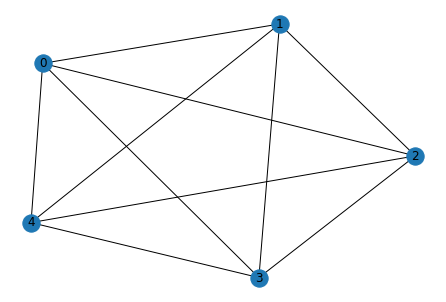

In [100]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint, random
from itertools import combinations, chain

# https://www.youtube.com/watch?v=MLGm6MUW_YI
K = nx.Graph()
K.add_nodes_from(range(5))
K.add_edges_from(combinations(K.nodes, 2))

plt.figure()
nx.draw(K, with_labels=True)

Una de las condiciones para que un grafo no sea plano es que no contenga un subgrafo isomorfo de este grafo $K_5$. Una manera de determinar esta condición es a través de cliques, pues el grafo $K_5$ contiene un clique máximo formado por todos sus nodos. De esta forma, si un un grafo se encuentra un clique de 5 nodos, dicho grafo no sería plano.

Ahora bien, se desarrollará un algoritmo para determinar los cliques y cliques máximos de un grafo. Inicialmente, se generará un grafo de $n$ nodos que tienen probabilidad $p$ de tener aristas con cualquier otro nodo.

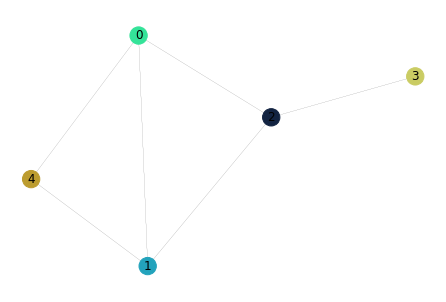

In [120]:
p = 0.8
n = 5

G = nx.Graph()
G.add_nodes_from(range(n))
colors = [(random(), random(), random()) for _i in range(n)]

for i in range(n):
    for j in range (i, n):
        if i != j and random() < p:
            G.add_edge(i, j)

options = {
    'node_size': 300,
    'width': 0.1
}

plt.figure()
# https://stackoverflow.com/a/8083655
nx.draw(G, with_labels=True, node_color=colors, **options)

In [132]:
cliques = []
max_cliques = []
# Por cada combinación
for i in G.nodes:
    for j in G[i]:
        nodes = set()
        edges = set()
        nodes.add(i)
        nodes.add(j)
        edges.add((i, j))
        cliques.append([nodes, edges])
        nodes = set()
        edges = set()
        nodes.add(i)
        nodes.add(j)
        edges.add((i, j))
        for k in G[j]:
            es_vecino = True
            if k in G[i]:
                for l in nodes:
                    if k not in G[l]:
                        es_vecino = False
                if es_vecino:
                    nodes.add(k)
                    edges.add((i, k))
                    edges.add((j, k))
                    cliques.append([nodes, edges])

<ipython-input-128-bea1dd8ae0e5>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


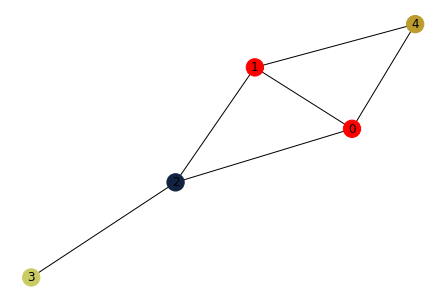

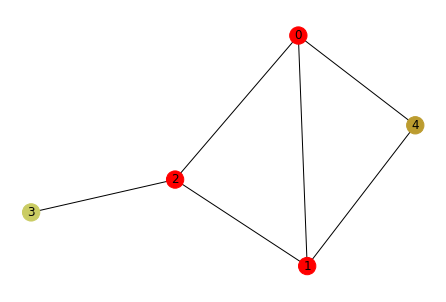

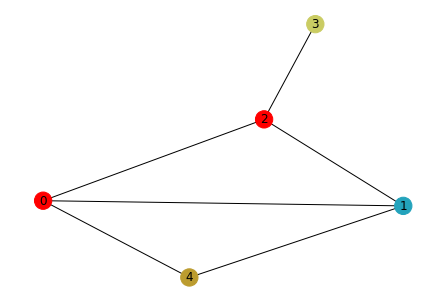

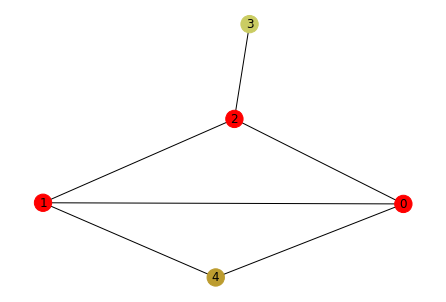

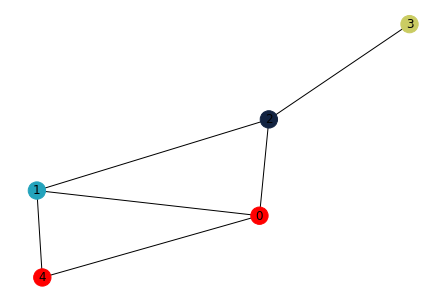

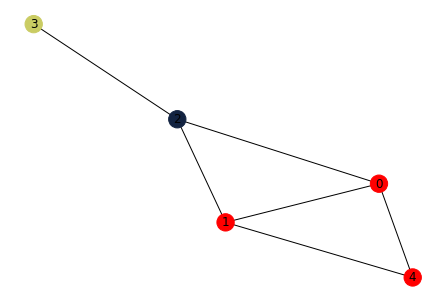

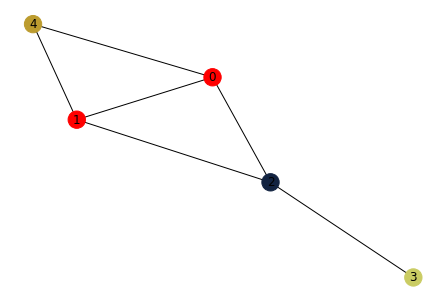

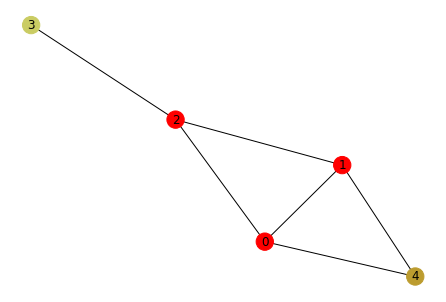

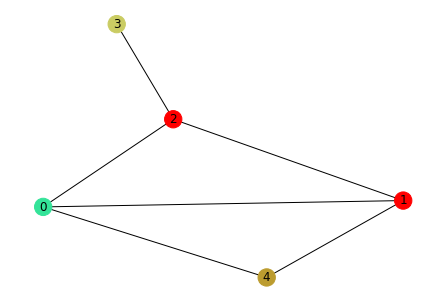

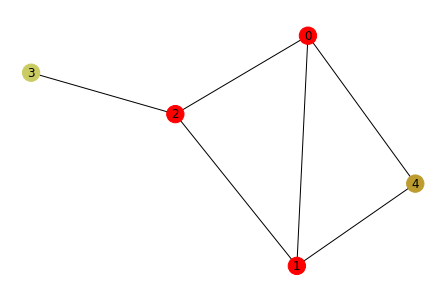

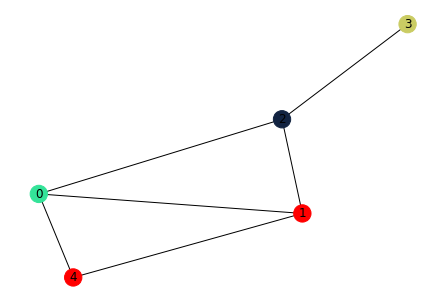

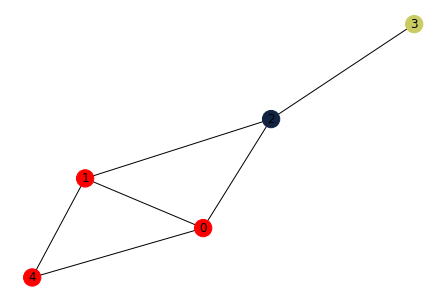

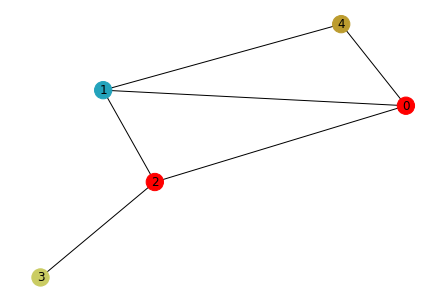

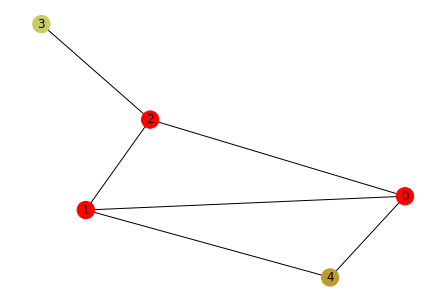

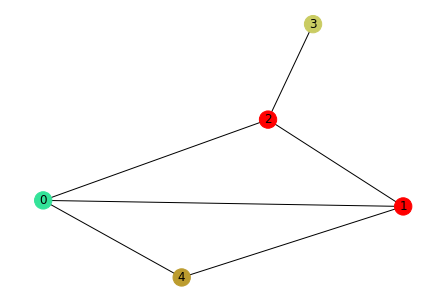

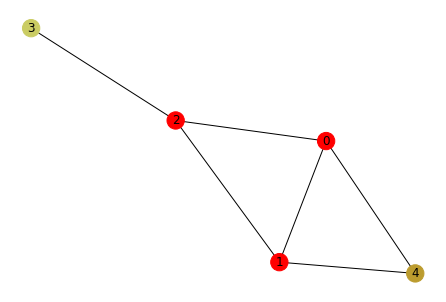

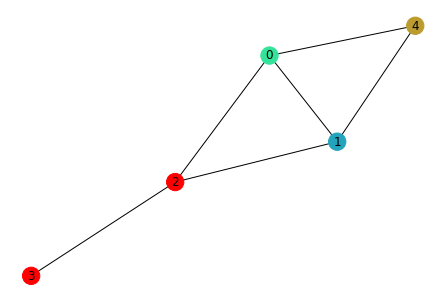

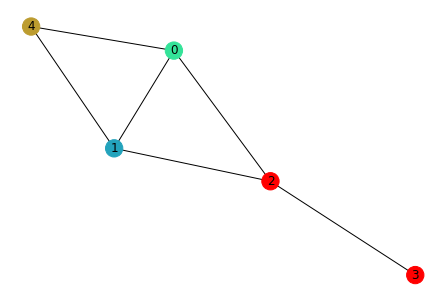

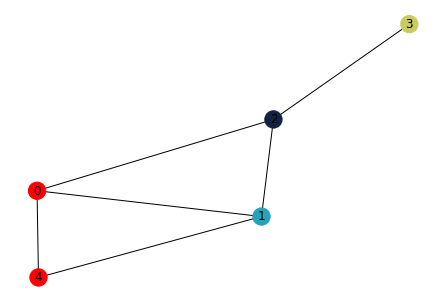

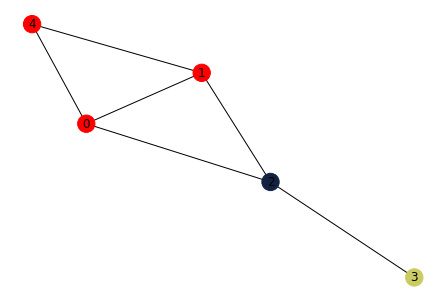

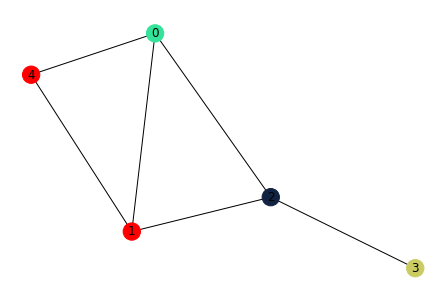

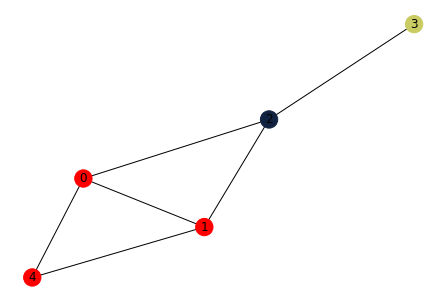

In [128]:
grafos = []
for i, j in cliques:
    C = nx.Graph()
    C.add_nodes_from(i)
    C.add_edges_from(j)
    grafos.append(C)
    C_colors = []
    for i in G.nodes:
        if i in C.nodes:
            C_colors.append('red')
        else:
            C_colors.append(colors[i])
    # https://stackoverflow.com/a/8083655
    plt.figure()
    nx.draw(G, with_labels=True, node_color=C_colors)